## 1. Cargar librerías

In [108]:
import numpy as np
import pandas as pd
import statistics as stat
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

## 2. Cargar los datos del dataset

In [109]:
df = pd.read_csv("./inmobiliaria.csv")

## 3. Visualizar los datos del dataset

In [110]:
print(df.describe())
print("\nValores nulos totales:\n", df.isnull().sum())
print(df.head())

       COD_INMUEBLE         AREA     VLR_CANON  VLR_ADMINISTRACION
count   6791.000000  6791.000000  6.791000e+03        6.791000e+03
mean    3396.000000    46.357385  1.112686e+06        1.474904e+05
std     1960.537171    26.973165  1.427193e+06        1.583145e+05
min        1.000000    10.000000  0.000000e+00        0.000000e+00
25%     1698.500000    23.000000  6.539400e+05        0.000000e+00
50%     3396.000000    39.000000  8.123400e+05        1.480000e+05
75%     5093.500000    70.000000  1.052160e+06        2.300000e+05
max     6791.000000   100.000000  2.931983e+07        5.116724e+06

Valores nulos totales:
 COD_INMUEBLE               0
NOM_SUCURSAL               0
NOM_BARRIO                 0
NOM_CIUDAD                 0
ESTRATO                   57
TIPO_INMUEBLE              0
AREA                       0
VLR_CANON                  0
VLR_ADMINISTRACION         0
FECHA_CONSIGNACION         0
FECHA_RECONSIGNACION    6408
FECHA_CONTRATO             1
COD_ESTADO_CONTRATO     

## 4. Graficando los datos

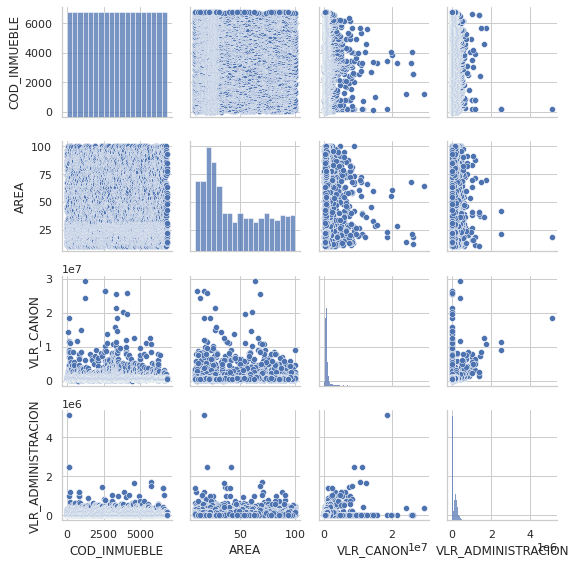

In [111]:
sb.set(style="whitegrid", context="notebook")
plot_data = df.columns
sb.pairplot(df[plot_data], height=2)
plt.tight_layout()
plt.show()

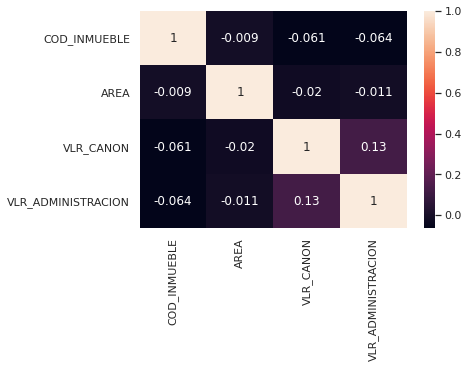

In [112]:
correlation_mat = df.corr()
sb.heatmap(correlation_mat, annot=True)
plt.show()

## 5. Normalizando datos

### 5.1 Reemplazando los valores nulos por el dato que más se repite 

In [113]:
def replace_nan_values(column):
    for i in range(len(df[column])):
        if df.isnull()[column][i]:
            df.loc[i, column] = stat.mode(df[column])


for i in range(len(df['ESTRATO'])):
    if df['ESTRATO'][i] == 'SIN ASIGNAR':
        df.loc[i, 'ESTRATO'] = np.nan

replace_nan_values('ESTRATO')

### 5.2 Visualizando los valores nulos totales

In [114]:
print("\nValores nulos totales:\n", df.isnull().sum())


Valores nulos totales:
 COD_INMUEBLE               0
NOM_SUCURSAL               0
NOM_BARRIO                 0
NOM_CIUDAD                 0
ESTRATO                    0
TIPO_INMUEBLE              0
AREA                       0
VLR_CANON                  0
VLR_ADMINISTRACION         0
FECHA_CONSIGNACION         0
FECHA_RECONSIGNACION    6408
FECHA_CONTRATO             1
COD_ESTADO_CONTRATO        0
dtype: int64


### 5.3 Reemplazando valores alfanuméricos por valores numéricos 

In [115]:
label_encoder = preprocessing.LabelEncoder()
df['NOM_SUCURSAL'] = label_encoder.fit_transform(df['NOM_SUCURSAL'])
df['NOM_BARRIO'] = label_encoder.fit_transform(df['NOM_BARRIO'])
df['NOM_CIUDAD'] = label_encoder.fit_transform(df['NOM_CIUDAD'])
df['ESTRATO'] = label_encoder.fit_transform(df['ESTRATO'])
df['TIPO_INMUEBLE'] = label_encoder.fit_transform(df['TIPO_INMUEBLE'])
df['COD_ESTADO_CONTRATO'] = label_encoder.fit_transform(df['COD_ESTADO_CONTRATO'])

### 5.4 Visualizar columnas del modelo

In [116]:
print("\nColumnas del modelo: \n", df.head(10))


Columnas del modelo: 
    COD_INMUEBLE  NOM_SUCURSAL  NOM_BARRIO  NOM_CIUDAD  ESTRATO  TIPO_INMUEBLE  \
0             1             0          81           0        2              0   
1             2             0          62           0        5              2   
2             3             0          62           0        5              0   
3             4             0          62           0        5              2   
4             5             0         237           0        5              0   
5             6             0          62           0        2              1   
6             7             0         153           0        2              2   
7             8             0          94           0        2              1   
8             9             0         124           0        2              2   
9            10             0         177           0        2              1   

   AREA  VLR_CANON  VLR_ADMINISTRACION FECHA_CONSIGNACION  \
0    23     632600     

In [117]:
df.drop(['COD_INMUEBLE', 'FECHA_CONTRATO', 'VLR_ADMINISTRACION', 'FECHA_RECONSIGNACION', 'FECHA_CONSIGNACION'], axis=1,
        inplace=True)
df.dropna(inplace=True)
print("\nColumnas del modelo: \n", df.head(10))


Columnas del modelo: 
    NOM_SUCURSAL  NOM_BARRIO  NOM_CIUDAD  ESTRATO  TIPO_INMUEBLE  AREA  \
0             0          81           0        2              0    23   
1             0          62           0        5              2    11   
2             0          62           0        5              0    24   
3             0          62           0        5              2    20   
4             0         237           0        5              0    33   
5             0          62           0        2              1    23   
6             0         153           0        2              2    27   
7             0          94           0        2              1    97   
8             0         124           0        2              2    29   
9             0         177           0        2              1    52   

   VLR_CANON  COD_ESTADO_CONTRATO  
0     632600                    2  
1     500000                    2  
2     500000                    0  
3     515900                

## 6. Separando los datos del modelo

In [118]:
x_axis = df.drop("COD_ESTADO_CONTRATO", axis=1)
y_axis = df["COD_ESTADO_CONTRATO"]

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x_axis, y_axis, test_size=0.2, random_state=20)

## 7. Entrenando modelo de árbol de regresión

In [120]:
regression_tree = DecisionTreeRegressor()
regression_tree.fit(x_train, y_train)

DecisionTreeRegressor()

## 8. Predicciones

In [121]:
y_pred = regression_tree.predict(x_test)
inferencia = accuracy_score(y_test, y_pred)
print(f"\nInferencia del modelo: {str(inferencia)} %")


Inferencia del modelo: 0.5879323031640913 %


## 9. Entrenando árbol de clasificación

In [122]:
arbol = DecisionTreeClassifier(max_depth=5, random_state=20)
arbol.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=20)

## 10. Inferencia del modelo de árbol de clasificación

In [123]:
y_train_predict = arbol.predict(x_train)
y_test_predict = arbol.predict(x_test)

print(f"Accuracy of train: %{str(accuracy_score(y_train_predict, y_train))}")
print(f"Accuary of train %{str(accuracy_score(y_test_predict, y_test))}")
print(f"Accuary global %{str(arbol.score(x_test, y_test))}")

Accuracy of train: %0.6395434462444771
Accuary of train %0.623252391464312
Accuary global %0.623252391464312
